1. 引入必要函數庫

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

2. 定義常用函數

In [2]:
def show_img(img,title,xlabel,ylabel):
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def save_img(img,name):
    cv2.imwrite(f'{name}.jpg',img)


3. Opencv 線性插值 實作

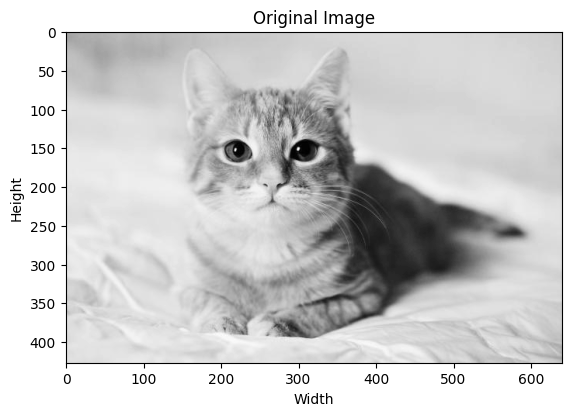

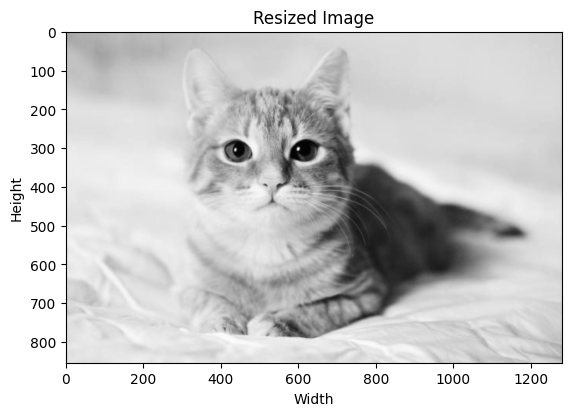

In [12]:
import cv2
import numpy as np

# 讀取圖像
image = cv2.imread('cat.jpeg')  # 替換成你的圖像路徑
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 設定新的圖像尺寸
width = image.shape[1] * 2  # 圖像寬度放大兩倍
height = image.shape[0] * 2  # 圖像高度放大兩倍
dim = (width, height)

# 使用OpenCV的resize函數放大圖像
resized = cv2.resize(gray_img, dim, interpolation=cv2.INTER_LINEAR)

# 顯示原始圖像和放大後的圖像
show_img(gray_img, 'Original Image', 'Width', 'Height')
show_img(resized, 'Resized Image', 'Width', 'Height')
save_img(gray_img,"Original")
save_img(resized,"Resized")
# cv2.imshow('Original Image', image)
# cv2.imshow('Resized Image', resized)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


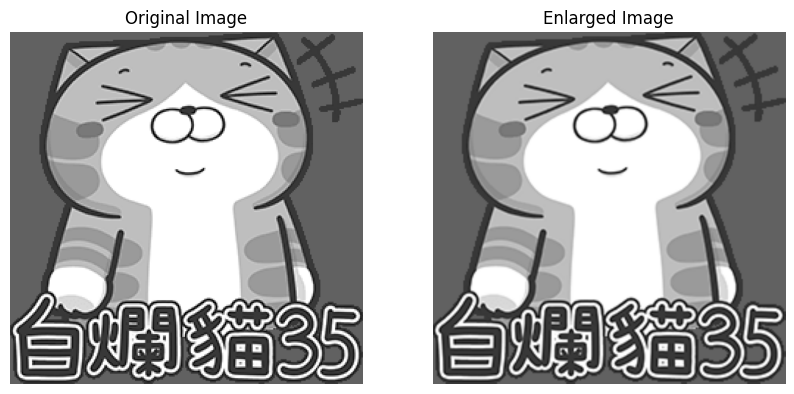

In [14]:
# 創建一個4x4的小灰階圖像
img_small = np.array([
    [60, 120, 180, 240],
    [50, 80, 120, 180],
    [40, 40, 60, 120],
    [30, 0, 0, 60]
], dtype=np.uint8)
# show_img(img_small, "Original Small Image","width","height")

def linear_interpolate(start_val, end_val, interpolation_factor):
    """
    在两个数值之间进行线性插值。

    参数:
    start_val (float): 插值的起始值。
    end_val (float): 插值的结束值。
    interpolation_factor (float): 插值因子，范围从0到1。
        当 interpolation_factor 为0时，返回 start_val。
        当 interpolation_factor 为1时，返回 end_val。
        当 interpolation_factor 在0到1之间时，返回两者之间的插值结果。

    返回:
    float: 插值结果。
    """
    # 计算插值结果
    interpolated_value = (1 - interpolation_factor) * start_val + interpolation_factor * end_val

    return interpolated_value
def show_images_before_and_after(original_img, enlarged_img):
    """
    展示放大前和放大后的图像。

    参数:
    original_img: 原始图像。
    enlarged_img: 放大后的图像。
    """
    plt.figure(figsize=(10, 5))

    # 展示原始图像
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # 展示放大后的图像
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(enlarged_img, cv2.COLOR_BGR2RGB))
    plt.title('Enlarged Image')
    plt.axis('off')

    plt.show()

def bilinear_interpolate(img, scale_factor):
    src_height, src_width = img.shape
    dst_height, dst_width = src_height * scale_factor, src_width * scale_factor
    dst_img = np.zeros((dst_height, dst_width), dtype=np.uint8)
    for y in range(dst_height):
        for x in range(dst_width):
            # 1. 把新的圖的座標轉回原始座標
            src_x = x/scale_factor # 3.3
            src_y = y/scale_factor
            # 2. 找出鄰近四個點 
            x1,y1 = np.floor([src_x, src_y]).astype(int)
            x2,y2 = np.ceil([src_x, src_y]).astype(int)
            # x2 = min(x2, src_width-1)# 確保不超過邊界 
            # y2 = min(y2, src_height-1)# 確保不超過邊界 
            dx = src_x - x1 # 0.3 距離Q1 x = 0.3 
            dy = src_y - y1 # 0.1 距離Q1 y = 0.1
            Q11 = img[y1,x1]
            Q12 = img[y1,x2]
            Q21 = img[y2,x1]
            Q22 = img[y2,x2]
            # 加權平均 Q11 Q12 Q21 Q22 
            # 加權是 
            # Q11---------Q12 
            # |      |      |
            # |      dy     |
            # |<-dx->P      |
            # |             |
            # Q21---------Q22
            value = (1-dx)*(1-dy)*Q11 + dx*(1-dy)*Q12 + (1-dx)*dy*Q21 + dx*dy*Q22
            dst_img[y, x] = int(value)
    return dst_img


    # for i in range(dst_height):
    #     for j in range(dst_width):
    #         # 計算在原始圖像中的浮點坐標
    #         src_x = j / scale_factor #新的座標換算成原本的座標 
    #         src_y = i / scale_factor 
    #         # 計算鄰近的四個點
    #         x1 = int(src_x)
    #         x2 = min(x1 + 1, src_width - 1)
    #         y1 = int(src_y)
    #         y2 = min(y1 + 1, src_height - 1)
    #         # 計算距離權重
    #         dx = src_x - x1
    #         dy = src_y - y1
    #         # 進行雙線性插值
    #         value = (1 - dx) * (1 - dy) * img[y1, x1] + dx * (1 - dy) * img[y1, x2] + \
    #                 (1 - dx) * dy * img[y2, x1] + dx * dy * img[y2, x2]
    #         dst_img[i, j] = int(value)
    return dst_img
def my_linear_interpolate(left,right,factor):
    return (right-left)*factor + left

img = cv2.imread('main.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray_img, (0, 0), fx=3, fy=3, interpolation=cv2.INTER_LINEAR)
resized_2 = bilinear_interpolate(gray_img, 4)
show_images_before_and_after(gray_img, resized_2)
save_img(resized_2,"Resized_by_hand")


In [20]:
import numpy as np

# 定義矩陣
matrix = np.array([
    [120, 180],
    [200, 250]
])
# 定義線性插值函數
def linear_interpolate(val1, val2, factor):
    return (1 - factor) * val1 + factor * val2
# 目標點坐標
target_x, target_y = 0.5, 0.5
# 計算dx和dy
dx = target_x
dy = target_y

# 水平方向的插值
val_top = linear_interpolate(matrix[0, 0], matrix[0, 1], dx)
val_bottom = linear_interpolate(matrix[1, 0], matrix[1, 1], dx)

print(f"Horizontal interpolation, top value: {val_top}")
print(f"Horizontal interpolation, bottom value: {val_bottom}")

# 垂直方向的插值
val_final = linear_interpolate(val_top, val_bottom, dy)

print(f"Final interpolated value at (0.5, 0.5): {val_final}")

Horizontal interpolation, top value: 150.0
Horizontal interpolation, bottom value: 225.0
Final interpolated value at (0.5, 0.5): 187.5


In [21]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a[0,-1])

3
